# Bank Marketing Campaign


This notebook illustrates the use of DSX for processing customer marketing data. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The data was originally presented by [Moro et al., 2014] and is available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

<div><br><img src="https://raw.githubusercontent.com/nmanchev/DSX/master/images/bank.jpg" width=600 /><br></div>

The key attributes of the data set are:

**Input variables**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default : has credit in default? (categorical: 'no','yes','unknown')
6. balance : account balance
7. housing : has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact : contact communication type (categorical: 'cellular','telephone')
10. day : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. month : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration : last contact duration, in seconds (numeric). 
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable**
17. y - has the client subscribed a term deposit? (binary: 'yes','no')

[Moro et al., 2014]  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data ingestion and exploratory data analysis

We start by reading the complete data set. The data is stored as a CSV file in Object Store. 
We connect to Object Store, read the CSV file, and print the first 10 rows.

In [75]:

# Edit this cell to load the data set as a Pandas DataFrame. Name the resulting frame dataDF.

dataDF.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


We start by looking for missing data.

In [76]:
dataDF.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It appears that there are no missing entries in the dataset. Let's plot some of the key attributes and see if anything stands out.

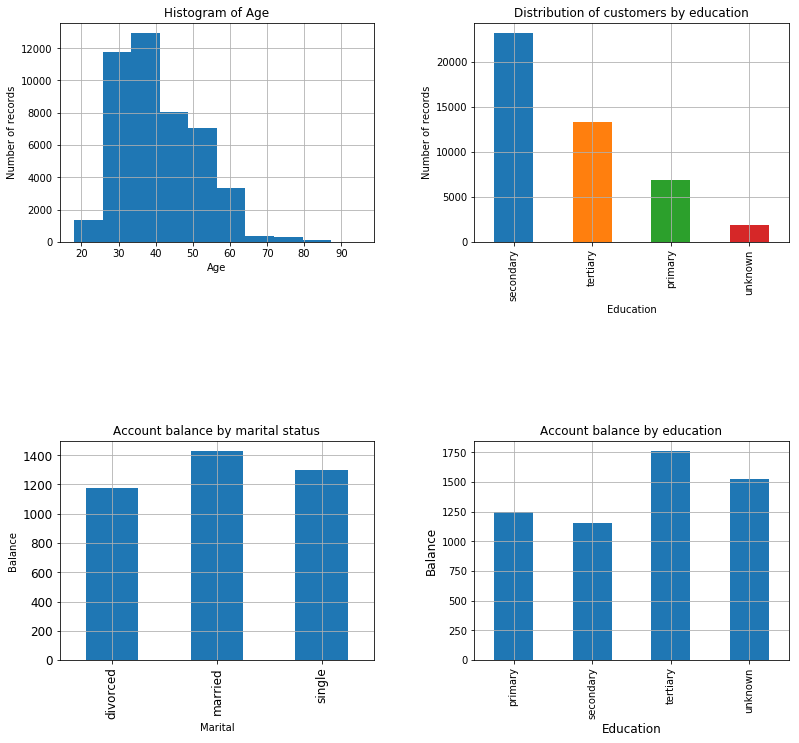

In [77]:
%matplotlib inline

import matplotlib.pyplot as plt

balanceDF = dataDF[["education", "balance"]]
maritalDF = dataDF[["marital", "balance"]]

f = plt.figure()

ax1 = f.add_subplot(221)
dataDF["age"].plot(ax = ax1, kind="hist", title ="Histogram of Age")
ax1.grid(True)
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of records")

ax2 = f.add_subplot(222)
balanceDF["education"].value_counts().plot(ax = ax2, kind="bar", title ="Distribution of customers by education")
ax2.set_xlabel("Education")
ax2.set_ylabel("Number of records")
ax2.grid(True)

ax3 = f.add_subplot(223)
maritalDF.groupby("marital").mean().plot(ax = ax3, kind='bar', title ="Account balance by marital status", figsize=(8, 6), legend=False, fontsize=12)
ax3.set_xlabel("Marital")
ax3.set_ylabel("Balance")
ax3.grid(True)

ax4 = f.add_subplot(224)
balanceDF.groupby("education").mean().plot(ax = ax4, kind='bar', legend=False, title ="Account balance by education")
ax4.set_xlabel("Education", fontsize=12)
ax4.set_ylabel("Balance", fontsize=12)
ax4.grid(True)

f.tight_layout()
f.set_figheight(12)
f.set_figwidth(12)

Let also look at the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [78]:
dataDF.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


By looking at the data sample, the descriptive statistics, and the plots makes it apparent that there are two issues we have to take care of:

* There is actually some missing data, the "unknwon" entries. We can try to impute the missing values or simply apply complete case analysis

* Some of the attributes in the dataset are categorical. We'll have to unpack them using dummy variables to make the dataset more suitable for the application of machine learning algorithms.

## Data Wrangling

We start by looking at the potential columns after unpacking all categorical attributes in the dataset.

In [79]:
import numpy as np

res = pd.get_dummies(dataDF)

res.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'], dtype=object)

We notice plenty of columns for unknown attribute values.
If we look at the unique values of the individual attributes we can indeed confirm that some missing data is present in the dataset.

In [80]:
pd.unique(dataDF["poutcome"])

array(['unknown', 'failure', 'other', 'success'], dtype=object)

Let see how many records are in the dataset and what's left if we only retain the complete cases.

In [81]:
n_observations = len(dataDF)

print("Number of observations: %i " % n_observations)

# Get the complete cases
completeDF = dataDF[dataDF["poutcome"]!="unknown"]
completeDF = completeDF[completeDF["job"]!="unknown"]
completeDF = completeDF[completeDF["education"]!="unknown"]
completeDF = completeDF[completeDF["contact"]!="unknown"]

n_complete_cases = len(completeDF)

print("Number of complete observations: %i " % n_complete_cases)
print("Retained records: %.2f%%" % (n_complete_cases*100/n_observations))


Number of observations: 45211 
Number of complete observations: 7842 
Retained records: 17.35%


It appears that complete case analysis is quite impractical in this situation. 

Let's try something a bit more clever. We'll move the target variable from the complete cases set to a dedicated labels data frame, and build an attribute importance model.

In [82]:
complete_targetDF = pd.Categorical(completeDF["y"])
complete_targetDF = complete_targetDF.codes
complete_inputDF = completeDF.drop("y", axis=1)
complete_inputDF = pd.get_dummies(complete_inputDF)

We can now train an extra trees classifier. This classifier implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. We can then look at the importance of each individual attribute and decide what to retain in the dataset.

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import display, HTML

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(complete_inputDF, complete_targetDF)

# display the relative importance of each attribute

attrDF = pd.DataFrame(np.column_stack((complete_inputDF.columns.values,model.feature_importances_)), columns=("Attribute","Importance"))
display(attrDF.sort_values("Importance"))


,Attribute,Importance
24,default_no,0.000656063
25,default_yes,0.000680221
9,job_entrepreneur,0.00398342
10,job_housemaid,0.00423705
34,month_dec,0.00454428
15,job_student,0.0046515
17,job_unemployed,0.00478531
13,job_self-employed,0.00504076
31,contact_telephone,0.00537514
36,month_jan,0.00661238


We can now focus on a subset of important features. It appears that most of the "unknowns" are in less important attributes anyway, so we don't have to discard much data.

The importance of the call duration (the *duration* attribute) is, however, quite suspicious. 

In [84]:
np.corrcoef(complete_inputDF["duration"], complete_targetDF)

array([[ 1.        ,  0.34634231],
       [ 0.34634231,  1.        ]])

Although the Pearson correlation coefficient suggests a weak uphill (positive) linear relationship it is better to discard this attribute from the set.

If we think about it, this attribute highly affects the output target as the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Let's now prepare the final training data frame.

In [85]:
trainingDataDF = pd.get_dummies(dataDF[["poutcome", "age", "balance", "previous", "housing", "marital"]])
trainingDataDF =trainingDataDF[["poutcome_success", "age", "balance", "previous", "housing_no", "housing_yes", "marital_divorced", "marital_married", "marital_single"]]
trainingTargetDF = pd.Categorical(dataDF["y"])
trainingTargetDF = trainingTargetDF.codes

Let's look at the first handful of observations.

In [86]:
trainingDataDF.head()

,poutcome_success,age,balance,previous,housing_no,housing_yes,marital_divorced,marital_married,marital_single
0,0,58,2143,0,0,1,0,1,0
1,0,44,29,0,0,1,0,0,1
2,0,33,2,0,0,1,0,1,0
3,0,47,1506,0,0,1,0,1,0
4,0,33,1,0,1,0,0,0,1


What was the amount of discarded records after applying the attribute importance strategy?

In [87]:
n_training = trainingDataDF.shape[0]
print("Number of retained observations: %i " % n_training)
print("Percentage of data retained: %.2f%%" % (n_training*100/n_observations))

Number of retained observations: 45211 
Percentage of data retained: 100.00%


## Training a predictive model

Let's split the data into a training a test sets. 

We retain 20% of the data for measuring the generalisation of the model.

In [88]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(trainingDataDF, trainingTargetDF, test_size=0.20, random_state=1234)

We will now train a logistic regression model, where the linear combination of input features is passed through a sigmoid function to make a class prediction. The standard scikit logit model also applies L2 regularization by default.

In [89]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

print("Model coefficients:")
print(logistic.coef_, "\n")

print("Model intercept:")
print(logistic.intercept_)

Model coefficients:
[[  2.49647278e+00   6.73131621e-03   2.76677671e-05   6.00752019e-02
   -3.10020758e-01  -1.06142520e+00  -4.78080039e-01  -6.95037578e-01
   -1.98328346e-01]] 

Model intercept:
[-1.37144596]


Now that we have a trained model we can make a prediction on the test data and measure the prediction accuracy.

In [90]:
from sklearn.metrics import accuracy_score

y_pred = logistic.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Prediction accuracy: %.2f%%" % (100*acc))

Prediction accuracy: 89.16%


This looks suspiciously good for a first attempt. Let's look at the distribution of the two outcome classes in the input dataset.

(array([ 7996.,  1047.]), array([0, 1, 2]), <a list of 2 Patch objects>)

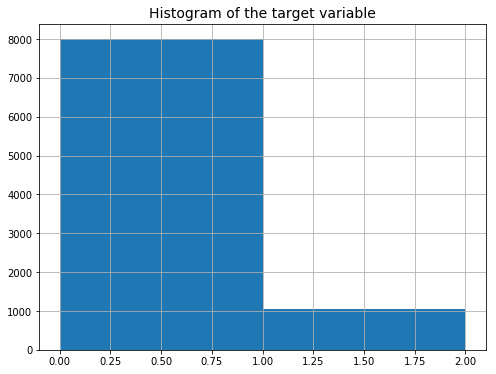

In [91]:
%matplotlib inline

f = plt.figure(figsize=(8,6))
plt.title("Histogram of the target variable", fontsize=14)
plt.grid()
plt.hist(y_test, bins=[0, 1,2])

It looks like we are dealing with a highly unbalanced data set, so the weight of the true negatives is skewing the accuracy statistics. 

This is also easily confirmed by looking at the confusion matrix for the predictions.

In [92]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7900,96,7996
1,884,163,1047
All,8784,259,9043


We can fix this by sampling the training set and making sure that the positive/negative ratio is 50:50.

In [93]:
# Get all positive
trainingDataPositiveDF = dataDF[dataDF["y"] == "yes"]
trainingDataNegativeDF = dataDF[dataDF["y"] == "no"].sample(n = len(trainingDataPositiveDF))
trainingDataDF = trainingDataPositiveDF.append(trainingDataNegativeDF)

# Merge
trainingTargetDF = pd.Categorical(trainingDataDF["y"])
trainingTargetDF = trainingTargetDF.codes

trainingDataDF = pd.get_dummies(trainingDataDF[["duration", "poutcome", "age", "balance", "previous", "housing", "marital"]])
trainingDataDF =trainingDataDF[["duration", "poutcome_success", "age", "balance", "previous", "housing_no", "housing_yes", "marital_divorced", "marital_married", "marital_single"]]



Let's split the sampled subset to a training/test sets and plot the distribution of the target variable.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(trainingDataDF, trainingTargetDF, test_size=0.20, random_state=1)

(array([ 1028.,  1088.]), array([0, 1, 2]), <a list of 2 Patch objects>)

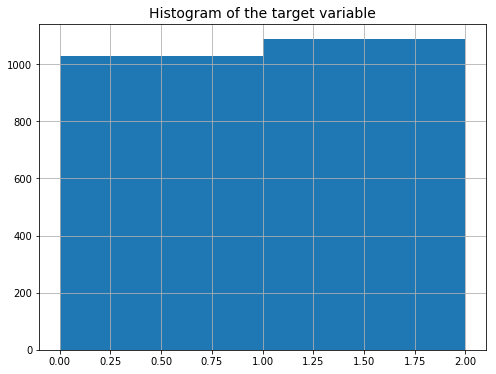

In [95]:
%matplotlib inline

f = plt.figure(figsize=(8,6))
plt.title("Histogram of the target variable", fontsize=14)
plt.grid()
plt.hist(y_test, bins=[0, 1,2])

We can now train and evaluate a new logistic regression model.

In [96]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred)

0.78827977315689979

The new model is more realistic and not biased towards the negative responses.

In [97]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,865,163,1028
1,285,803,1088
All,1150,966,2116
